In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict
from scipy.stats.mstats import gmean
import netCDF4 as nc

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display



%matplotlib inline

In [2]:
df1 = pd.read_excel('nutrients_2018dfo.xlsx',parse_dates=['dtUTC'])

In [3]:
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2018,8,31)
flen=1
PATH = '/home/jvalenti/scratch/run_SHEM/SHEM18'
namfmt='nowcast'
filemap={'nitrate':'biol_T','silicon':'biol_T','ammonium':'biol_T','diatoms':'biol_T',
        'flagellates':'biol_T'}
fdict={'biol_T':24}

In [4]:
M_path = '/home/jvalenti/MOAD/'
mask_path = M_path+'grid2/mesh_mask202108_TDV.nc'

In [5]:
df1

,Unnamed: 0,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Oxygen_Dissolved,Oxygen_Dissolved_units,Z,dtUTC
0,0,2018,3,6,6.547222,48.299167,-124.003667,2.3,2.3,NaN,mg/m^3,25.04,43.58,umol/L,31.863860,7.772878,254.5,umol/kg,2.3,2018-03-06 06:32:50
1,1,2018,3,6,6.547222,48.299167,-124.003667,2.3,2.3,1.59,mg/m^3,NaN,NaN,umol/L,31.864262,7.773274,NaN,umol/kg,2.3,2018-03-06 06:32:50
2,2,2018,3,6,6.547222,48.299167,-124.003667,2.3,2.3,NaN,mg/m^3,NaN,NaN,umol/L,31.866473,7.776051,NaN,umol/kg,2.3,2018-03-06 06:32:50
3,3,2018,3,6,6.547222,48.299167,-124.003667,5.1,5.1,NaN,mg/m^3,25.57,43.75,umol/L,31.873879,7.769256,252.5,umol/kg,5.1,2018-03-06 06:32:50
4,4,2018,3,6,6.547222,48.299167,-124.003667,10.0,9.9,NaN,mg/m^3,NaN,NaN,umol/L,31.884705,7.775262,NaN,umol/kg,9.9,2018-03-06 06:32:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,770,2018,3,6,21.133333,49.198640,-123.437920,NaN,NaN,NaN,NaN,23.00,51.40,umol/L,NaN,NaN,NaN,NaN,NaN,2018-03-06 21:08:00
771,771,2018,3,6,21.133333,49.198640,-123.437920,NaN,NaN,NaN,NaN,23.70,50.20,umol/L,NaN,NaN,NaN,NaN,NaN,2018-03-06 21:08:00
772,772,2018,3,6,21.133333,49.198640,-123.437920,NaN,NaN,NaN,NaN,27.10,57.30,umol/L,NaN,NaN,NaN,NaN,NaN,2018-03-06 21:08:00
773,773,2018,3,6,23.583333,49.030000,-123.437000,NaN,NaN,5.32,mg/m^3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-06 23:35:00


In [ ]:
#data=et.matchData(df1,filemap,fdict,mask_path,mod_start=start_date,mod_end=end_date,mod_basedir=PATH,mod_nam_fmt='shem')

mod_start=2018-01-01 00:00:00
mod_end=2018-08-31 00:00:00
(Lat,Lon)= 49.29533333333333 -123.0555  not matched to domain
(Lat,Lon)= 49.2985 -123.0966666666667  not matched to domain
(Lat,Lon)= 49.29933333333334 -122.983  not matched to domain
(Lat,Lon)= 49.30483333333333 -122.9411666666667  not matched to domain


In [ ]:
#data.to_excel('nutrientsshem.xlsx')

In [14]:
datashem = pd.read_excel('nutrientsshem.xlsx',parse_dates=['dtUTC'])
data = pd.read_excel('nutrients2021.xlsx',parse_dates=['dtUTC'])

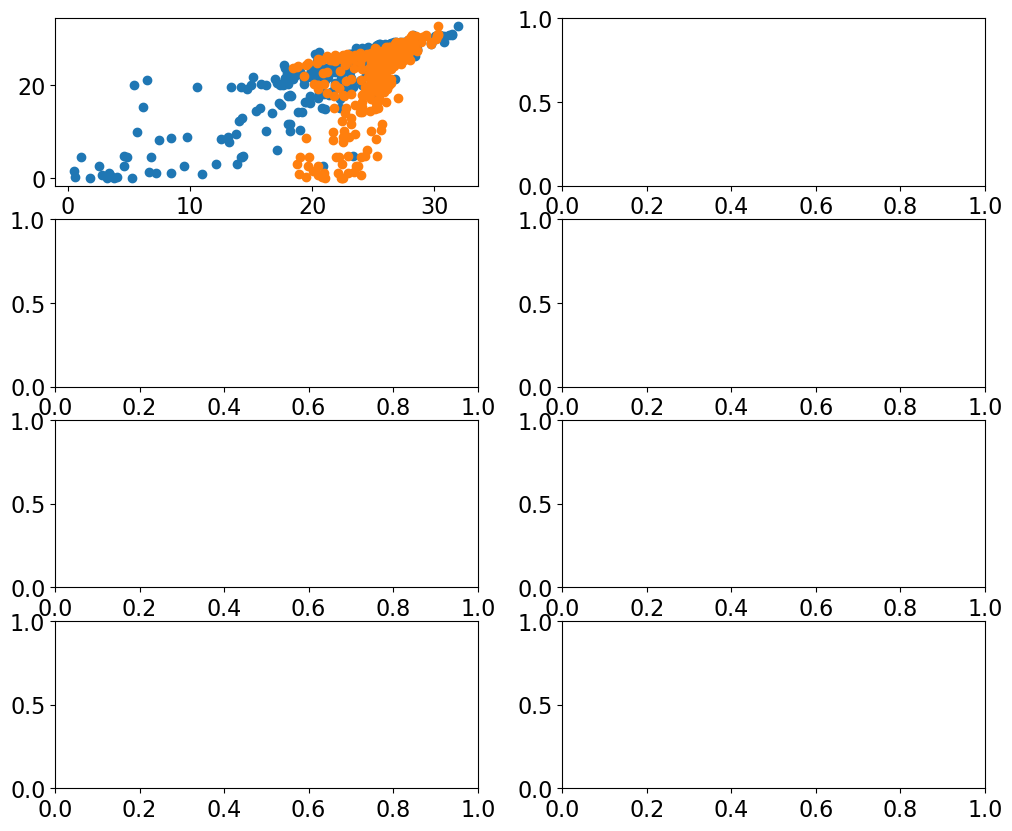

In [18]:
fig,axs = plt.subplots(4,2,figsize=(12,10))
    
axs[0,0].scatter(data.mod_nitrate,data.N)
axs[0,0].scatter(datashem.mod_nitrate,data.N)